# Star Wars Survey

[Star Wars](https://en.wikipedia.org/wiki/Star_Wars) is a franchies containing awide array of films, books, television series, video games, and more. Popular in the American pop-culture Zeitgeist, whose introduction in 1977 helped to bring science fiction to the forefront of the cultural eye; being enjoyed by a significantly wider demographic of people allowed for a boom in sci-fi media in the mainstream media. In 2014, just prior to the release of [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens), [FiveThirtyEight](fivethirtyeight.com) collected data in a survey about how the general public views Star Wars. The goal of the survy was to find out the answer to the question: "<b>Does the rest of America realize that 'The Empire Strikes Back' is clearly the best of the bunch?</b>". The data for the survey that we'll be using can be found [here](https://github.com/fivethirtyeight/data/blob/master/star-wars-survey/StarWars.csv).


# Contents
 1. [Data Introduction](#Data): A breakdown of the data being used in this project. 
 2. [Goal](#Goal): An explanation of the intended accomplishments.
 3. [Getting Started](#get_start): Reading in the data, cleaning, and amalgamating it.
 4. [The Search for Deeper Cleaning in Life](#deep_clean): Cleaning the data for analysis. 
 5. [Recombination and Spot Cleaning](#spot_sweep): General analysis and minor tweaks.
 6. [Demographics and Favorites](#demographics): Analyzing the average ranking, seen percentage, favorite characters, and Star Wars/Trek preference across demographics.<br>
&emsp;&emsp;a. [Sex](#sex_data)<br>
&emsp;&emsp;b. [Age](#age_data)<br>
&emsp;&emsp;c. [Household Income](#income_data)<br>
&emsp;&emsp;d. [Education](#education_data)<br>

<a id="Data"></a>
## Data Introduction
The data has several columns, including:

- `RespondentID` - An anonymized ID for the respondent (person taking the survey)
- `Gender` - The respondent's gender
- `Age` - The respondent's age
- `Household Income` - The respondent's income
- `Education` - The respondent's education level
- `Location (Census Region)` - The respondent's location
- `Have you seen any of the 6 films in the Star Wars franchise?` - Has a Yes or No response
- `Do you consider yourself to be a fan of the Star Wars film franchise?` - Has a Yes or No response
- `Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.` - Lists 13 Characters

<a id="Goal"></a>
## Goal
Aside from checking to see the answer to the question FiveThirtyEight posed, which is one of the goals, we will be exploring this data to see what else we can glean from this data. We will seek to answer questions such as the following: 

- Does socioeconomics play a role in the appeal of Star Wars? Favorite characters?
- What about Gender? Age? Education? 
- Is there an overall obviously worst movie? Character? 
- What kind of people <i>don't</i> watch Star Wars?

<a id="get_start"></a>
## Getting Started


In [1]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

#reading in csv
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episo

Initial observations: 
- The first row is an identifier row, telling us which characters or movies the `Unnamed` columns represent. Should be removed and isolated to be used to rename some columns.
- The column `Do you consider yourself to be a fan of the Expanded Universe?æ` must be renamed because it has some symbols that are informationally irrelevant.
- A few columns have all `'Yes'`/`'No'` answers which can be replaced with boolean values (`True`/`False`) to make them easier to work with. 
- People who have seen <i>none</i> of the Star Wars movies have a lot of `NaN` value answers for that very reason, so anyone who hasn't seen them should be removed and put in their own dataframe, called `unseen_people`; we can remove unnecessary columns (i.e. all `NaN` values) from that dataframe.  

In [2]:
#isolating ID row
id_row = star_wars.loc[0,:]

#renaming column with aberrant character
star_wars = star_wars.rename(columns={star_wars.columns[-7]:'Do you consider yourself to be a fan of the Expanded Universe?'})

In [3]:
#maps 'Yes' and 'No' strings to 'True'/'False' values respectively
yn_boo = {
    "Yes": True,
    "No": False
}

In [4]:
#identifying columns to map
bool_cols = ['Have you seen any of the 6 films in the Star Wars franchise?', 'Do you consider yourself to be a fan of the Star Wars film franchise?','Do you consider yourself to be a fan of the Expanded Universe?','Do you consider yourself to be a fan of the Star Trek franchise?']

#map columns, assigns back to original dataframe
for x in bool_cols:
    star_wars[x] = star_wars[x].map(yn_boo)

In [5]:
#separates seen/unseen
seen_survey = star_wars[star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] == True]
unseen_people = star_wars[star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] == False]

In [6]:
#creates copies to preserve the original
seen_clean = seen_survey.copy()
unseen_cleen = unseen_people.copy()

<a id="deep_clean"></a>
### The Search for Deeper Cleaning in Life
Now it's time to clean up the two dataframes. 

Because we're removing quite a few columns from `unseen_cleen`, it'll be easier to clean that first. For that dataframe, we'll do the following:

- Remove `NaN` value-rich columns from `unseen_cleen`.


In [7]:
#identifying non-NaN columns in unseen_cleen
answer_cols = ['RespondentID','Have you seen any of the 6 films in the Star Wars franchise?','Do you consider yourself to be a fan of the Star Trek franchise?','Gender', 'Age', 'Household Income', 'Education','Location (Census Region)']
unseen_cleen = unseen_cleen[answer_cols]


In [8]:
unseen_cleen.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
      dtype='object')

For the `seen_clean`, we will:

- Change the `seen_x` columns to `True`/`False` values instead of their current strings. 
- Rename the `Unnamed X` columns to `seen_x`, `ranking_x`, and `[char_name]`, based on their values in the ID row.
- Change the `ranking_x` columns to `float` values.
- Change the `char_name` columns to numerical values based on their word answers. 

In [9]:
#creating dictionary for the seen_x columns, renaming them accordingly, and creating a variable representing the new column names
seen_dict = {'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1','Unnamed: 4':'seen_2','Unnamed: 5':'seen_3','Unnamed: 6':'seen_4','Unnamed: 7':'seen_5','Unnamed: 8':'seen_6'}
seen_clean = seen_clean.rename(columns=seen_dict)
seen_cols = seen_clean.columns[3:9]

#creating copy to avoid accidentally overwriting data by running cell twice 
seen_cols_strings = seen_clean[seen_cols].copy()

#creating a null map to replace the string values in the seen_x columns with boolean values
null_map = seen_cols_strings.isnull()==False
seen_clean[seen_cols] = null_map

#creating dictionary for the ranking_x columns, renaming them accordingly, and creating a variable representing the new column names
rank_dict = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
       'Unnamed: 10':'ranking_2', 'Unnamed: 11':'ranking_3', 'Unnamed: 12':'ranking_4', 'Unnamed: 13':'ranking_5',
       'Unnamed: 14':'ranking_6'}
seen_clean = seen_clean.rename(columns=rank_dict)
rank_cols = seen_clean.columns[9:15]

#converting the ranking_x columns to floats
seen_clean[rank_cols] = seen_clean[rank_cols].astype(float)

#creating dictionary for the character_name columns, renaming them accordingly, and creating a variable representing the new column names
char_dict = id_row[-23:-9].to_dict()
seen_clean = seen_clean.rename(columns=char_dict)
char_cols = seen_clean.columns[-23:-9]

#creating dictionary for character ranks
ranking_value_dict = {
    'Very favorably':5, 
    'Unfamiliar (N/A)':np.nan, 
    'Somewhat favorably':4,
    'Very unfavorably':1, 
    'Neither favorably nor unfavorably (neutral)':3,
    'Somewhat unfavorably':2}

#mapping the new values
for x in char_cols:
    seen_clean[x] = seen_clean[x].map(ranking_value_dict)

<a id = 'spot_sweep'></a>
# Recombination and Spot Cleaning
Now we'll recombine the cleaned data so we can work with the general population first so we can observe the aberrations in other groups. 

- Anything with a `NaN` value in the `Age` column has `NaN` for all of the other demographic and other data we're interested in so we can remove them too.
- The first plot to look at will simply be the demographics breakdown so we have something to reference.
- The next two plots will show which movie was ranked highest on average, and which was seen the most. 

In [10]:
#concatenating cleaned dataframes to identify rankings and any information about the population surveyed as a whole (e.g., avg income, age, etc.) 
    #to check how other groups may deviate from those averages
clean_both = pd.concat([seen_clean, unseen_cleen], axis=0)

#creating a variable that represents the demographics columns names for easy calling of demographics data
demographic_cols = clean_both.columns[-5:]

#removing any rows where 'Age' is a `Nan` value, because the corresponding demographic data is ostensibly missing
clean_both = clean_both[clean_both['Age'].isnull()==False]

In [11]:
#extracting the percentage of each movie seen and each average rank from seen_clean
seen_per = seen_clean[seen_cols].mean()*100
rank_mean = seen_clean[rank_cols].mean()

In [12]:
rank_mean

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

In [13]:
seen_per

seen_1    71.901709
seen_2    61.004274
seen_3    58.760684
seen_4    64.850427
seen_5    80.982906
seen_6    78.846154
dtype: float64

In [14]:
#creating a list of the movies to form an index for both the seen_per column and the rank_mean column
movie_list = ['episode_1', 'episode_2', 'episode_3', 'episode_4', 'episode_5', 'episode_6']

#creating column name list
sr_cols = ['seen','rank']

#using those lists to create an empty dataframe with desired index and column names
movies_seen_rank = pd.DataFrame(index=movie_list, columns = sr_cols)

#naming the index
movies_seen_rank.index.name = 'episode'

#populating the dataframe
for x in range(0,6):
    movies_seen_rank['seen'][x] = seen_per.iloc[x]
    movies_seen_rank['rank'][x] = rank_mean.iloc[x]

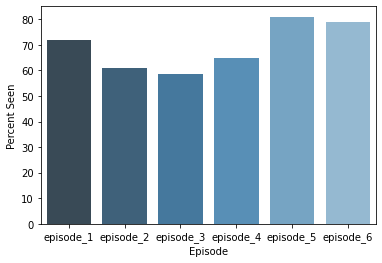

In [15]:
sns.barplot(x=movies_seen_rank.index, y='seen', palette="Blues_d",data=movies_seen_rank).set(xlabel='Episode', ylabel='Percent Seen');

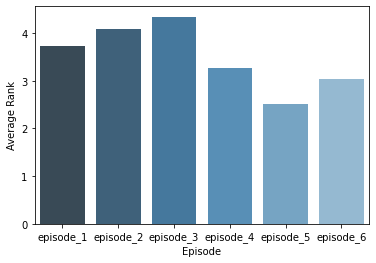

In [16]:
sns.barplot(x=movies_seen_rank.index, y='rank',palette="Blues_d", data=movies_seen_rank).set(xlabel='Episode', ylabel='Average Rank');

It's initially apparent that Episode V was both the most seen and the highest ranked, which makes a lot of sense; the first movie drew excitement so more people went to see the sequel. The first question, the one FiveThirtyEight set out to answer, seems to be resolved right here: the average person surveyed agreed that <i>The Empire Strikes Back</i> is the best of the bunch. 

<a id = 'demographics'></a>
# Demographics
First we'll take a quick look at the general demographics data for those surveyed, to get a general understanding of the data we're working with. 

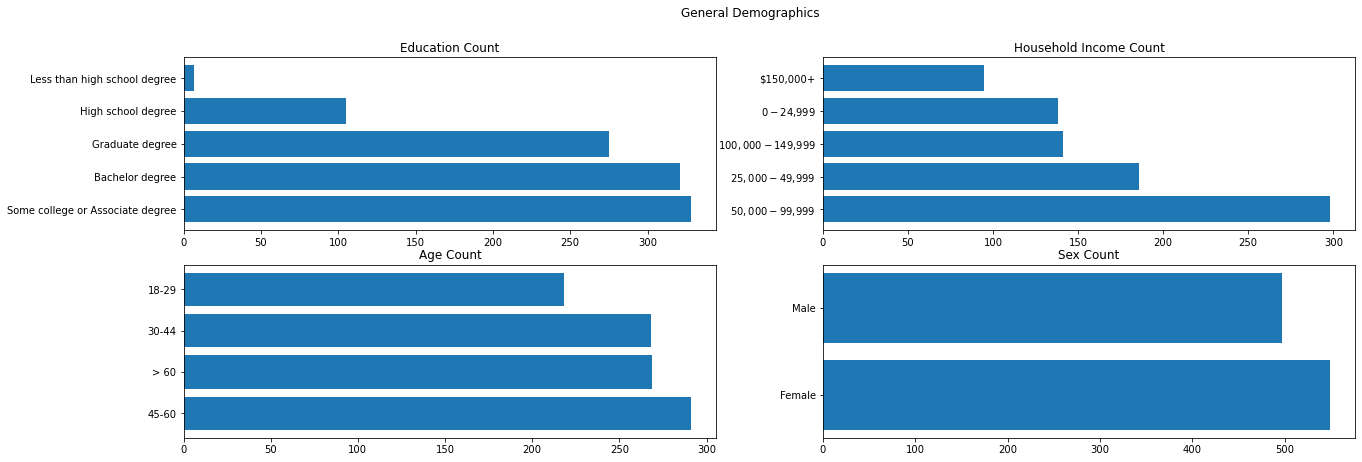

In [17]:
#creating a figure to house the demographics plots
fig = plt.figure(figsize=(21,7))

#creating four axes to house our subplots
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

#titles the full figure
fig.suptitle('General Demographics')

#education count subplot
ax1.barh(clean_both['Education'].value_counts().index, (clean_both['Education'].value_counts().values))
ax1.set_title('Education Count')

#household count subplot
ax2.barh(clean_both['Household Income'].value_counts().index, (clean_both['Household Income'].value_counts().values))
ax2.set_title('Household Income Count')

#age count subplot
ax3.barh(clean_both['Age'].value_counts().index, (clean_both['Age'].value_counts().values))
ax3.set_title('Age Count')

#sex subplot
ax4.barh(clean_both['Gender'].value_counts().index, (clean_both['Gender'].value_counts().values))
ax4.set_title('Sex Count');

Next step we can isolate all of the various demographics into their own dataframes for easy comparisons.

In [18]:
#isolating by sex
male_seen = seen_clean[seen_clean['Gender']=='Male']
female_seen = seen_clean[seen_clean['Gender']=='Female']

#isolating by Household Income
poor_seen = seen_clean[seen_clean['Household Income'] == '$0 - $24,999']
lowmid_seen = seen_clean[seen_clean['Household Income'] == '$25,000 - $49,999']
upmid_seen = seen_clean[seen_clean['Household Income'] == '$100,000 - $149,999']
rich_seen = seen_clean[seen_clean['Household Income'] == '$150,000+']
all_income = [poor_seen, lowmid_seen, upmid_seen, rich_seen]

#isolating by Age
youngest_seen = seen_clean[seen_clean['Age'] == '18-29']
young_seen = seen_clean[seen_clean['Age'] == '30-44']
old_seen = seen_clean[seen_clean['Age'] == '45-60']
oldest_seen = seen_clean[seen_clean['Age'] == '> 60']
all_ages = [youngest_seen, young_seen, old_seen, oldest_seen]

#isolating by education
hs_drop_seen = seen_clean[seen_clean['Education']=='Less than high school degree']
ged_seen= seen_clean[seen_clean['Education'] == 'High school degree']
some_college_seen = seen_clean[seen_clean['Education'] == 'Some college or Associate degree']
bach_seen = seen_clean[seen_clean['Education'] == 'Bachelor degree']
grad_seen = seen_clean[seen_clean['Education'] == 'Graduate degree']
all_education = [hs_drop_seen, ged_seen, some_college_seen, bach_seen, grad_seen]

Below we'll define a function to extract all of the ranking data and seen percentages from any given demographic set and return it in a neat, unique dataframe. 

In [19]:
def seen_rank(x):
    #extracting the percentage of each movie seen and each average rank from x
    seen_per_x = x[seen_cols].mean()*100
    rank_mean_x = x[rank_cols].mean()

    
    #creating a list of the movies to form an index for both the seen_per column and the rank_mean column: 
    movie_list = ['episode_1', 'episode_2', 'episode_3', 'episode_4', 'episode_5', 'episode_6']
    #creating column name list: 
    sr_cols = ['seen','rank']
    #using those lists to create an empty dataframe with desired index and column names
    movies_seen_rank_x = pd.DataFrame(index=movie_list, columns = sr_cols)

    #naming the index
    movies_seen_rank.index.name = 'episode'

    #populating the dataframe
    for z in range(0,6):
        movies_seen_rank_x['seen'][z] = seen_per_x.iloc[z]
        movies_seen_rank_x['rank'][z] = rank_mean_x.iloc[z]

    return movies_seen_rank_x

## Sex
First demographic to take a look at is sex. We'll see if males and females tend to agree or disagree on their movie rankings and which ones they've seen most. Then we can see whether Star Trek or Star Wars is preferred, and then finally we'll take a look at character preferences

In [20]:
#getting seen + rank values for individual demographics
seen_rank_male = seen_rank(male_seen)
seen_rank_female = seen_rank(female_seen)

#unifying for reference
both_sex = [seen_rank_female, seen_rank_male]

#combining them into a multiindex dataframe
sex_combined = pd.concat(both_sex, keys=['Female', 'Male'], axis=0).reset_index(level=1)

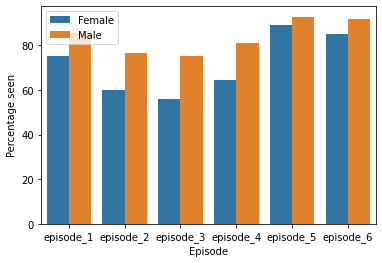

In [21]:
sns.barplot(x='level_1', y='seen', hue=sex_combined.index, data=sex_combined).set(xlabel='Episode', ylabel='Percentage seen');

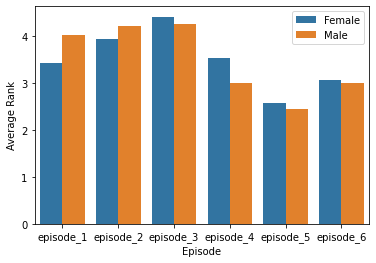

In [22]:
#sns.barplot(x='level_1', y='rank', hue=sex_combined.index, data=sex_combined).set(xlabel='Episode', ylabel='Average Rank');

In [71]:
#grouping ranking columns' names with the one for the demographic of interest
rank_and_sex = ['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6','Gender']

#creating an empty series to populate
sex_rank_series = pd.Series(dtype='float')

#pulls a slice of data regarding the ranks of one episode
def get_ranking(val):
    return getattr(clean_both[rank_and_sex].groupby(['Gender']), "ranking_"+val).value_counts()

#one big dataframe containing slices of data for each episode
sex_ranks_by_episode = [get_ranking(str(i)) for i in range(1,7)]

#for loop iterates over data slices, concatenates into a multi-index dataframe, then populates them with the value counts, episode numbers, etc.
for x in np.arange(1,7):
    ep = sex_ranks_by_episode[(x-1)]
    sr_concat = pd.concat({'episode_{num}'.format(num=x):ep}, names=['Episode', 'Gender', 'Ranking'])
    sex_rank_series = sex_rank_series.append(sr_concat)
    sex_rank_index = pd.MultiIndex.from_tuples(sex_rank_series.index, names=['Episode', 'Gender', 'Ranking'])   

#takes the sex_rank_series index ( aseries of tuples) and creates a multi-index series for easier graphing
mf_rank = pd.DataFrame(data={'val':sex_rank_series.values}, index=sex_rank_index).reset_index()

In [100]:
#generates gender masks
fem_mask = mf_rank['Gender']=='Female'
male_mask = mf_rank['Gender']=='Male'

#applies percentage conversion
f_rank_per = mf_rank.mask(fem_mask, (mf_rank['val']/female_seen.shape[0])*100, axis=0)
m_rank_per = mf_rank.mask(male_mask, (mf_rank['val']/male_seen.shape[0])*100, axis=0)

#for ease of reference
f_rank_col = f_rank_per['val']
m_rank_col = m_rank_per['val']

#adds the percentages 
mf_rank['rank_per'] =f_rank_col[f_rank_per['Gender']!='Male']
mf_rank['rank_per']= mf_rank['rank_per'].fillna(m_rank_col[m_rank_per['Gender']!='Female'])

In [102]:
f_rank_per

,Episode,Gender,Ranking,val,rank_per
0,30.2267,30.2267,30.226700,30.226700,30.226700
1,19.6474,19.6474,19.647355,19.647355,19.647355
2,16.3728,16.3728,16.372796,16.372796,16.372796
3,13.0982,13.0982,13.098237,13.098237,13.098237
4,11.5869,11.5869,11.586902,11.586902,11.586902
...,...,...,...,...,...
67,episode_6,Male,2.000000,115.000000,27.186761
68,episode_6,Male,1.000000,67.000000,15.839243
69,episode_6,Male,6.000000,58.000000,13.711584
70,episode_6,Male,4.000000,30.000000,7.092199


In [96]:
top_3 = mf_rank[mf_rank['Ranking']<4]

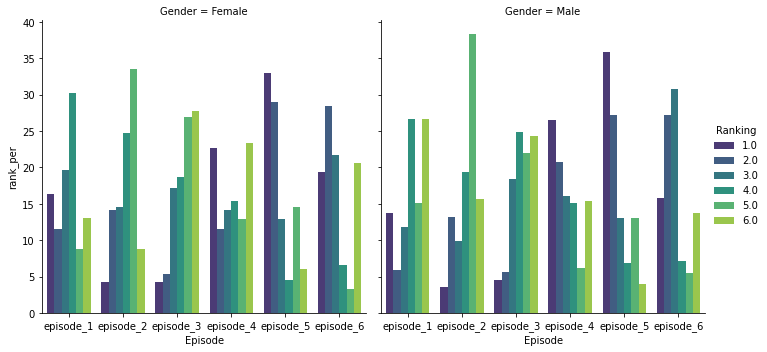

In [97]:
sns.catplot(x='Episode', y='rank_per', hue='Ranking', col='Gender', kind='bar', orient='v', data=mf_rank, palette='viridis');

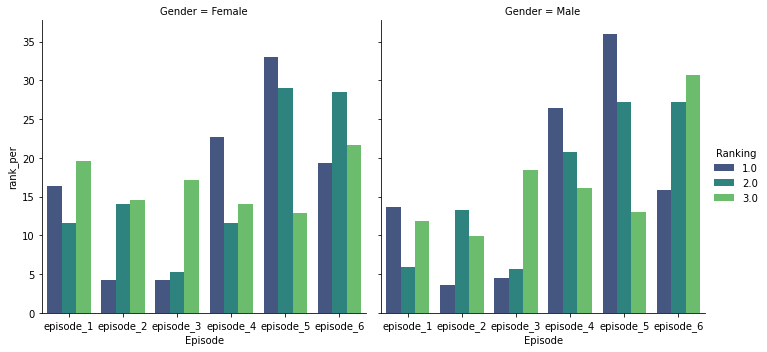

In [98]:
sns.catplot(x='Episode', y='rank_per', hue='Ranking', col='Gender', kind='bar', orient='v', data=top_3, palette='viridis');

In [112]:
#percentage fans of Star Trek
print(female_seen[female_seen.columns[-6]].sum()/397)
print(male_seen[male_seen.columns[-6]].sum()/423)

0.45591939546599497
0.5437352245862884


In [33]:
#isolating means by sex
male_means=male_seen[char_cols].mean()
female_means=female_seen[char_cols].mean()

#combining for reference
both_means = [male_means, female_means]

#combining them into a multiindex dataframe
mf_means = pd.concat(both_means, keys=['Male', 'Female'], axis=0).reset_index(level=1)
mf_means = mf_means.rename(columns={mf_means.columns[1]:'avg_rank'})

#sorting by average rank
mf_means_sorted = mf_means.sort_values(by=['avg_rank'])

#isolating all characters with an average rank above a 4
mf_means_high = mf_means_sorted[mf_means_sorted['avg_rank']>4]

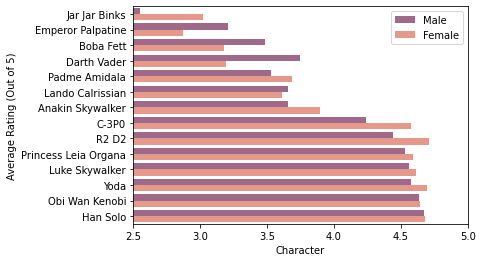

In [82]:
sns.barplot(x='avg_rank', y='level_1', hue=mf_means_sorted.index, data=mf_means_sorted, orient='h', palette='rocket', alpha =0.7).set(xlabel='Character', ylabel='Average Rating (Out of 5)', xlim=(2.5,5) );

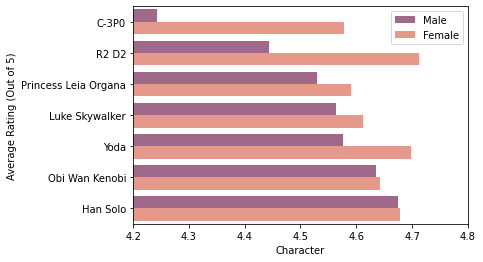

In [83]:
sns.barplot(x='avg_rank', y='level_1', hue=mf_means_high.index, data=mf_means_high, orient='h', palette='rocket', alpha =0.7).set(xlabel='Character', ylabel='Average Rating (Out of 5)', xlim=(4.2,4.8) );

Interestingly enough, it appears that males and females tend to rank Star Wars characters' favorability relatively equally with the singular exception that females overwhelmingly favor R2-D2 over males. 

In [36]:
clean_both.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
      dtype='object')

In [84]:
#isolating the question and demographic of interest
trek_sex = clean_both[['Do you consider yourself to be a fan of the Star Trek franchise?','Gender']]

#isolating by demographic grouping
male_trek = trek_sex[trek_sex['Gender']=='Male'] #497
fem_trek = trek_sex[trek_sex['Gender']=='Female'] #549

#percentage values
fem_trek_per = fem_trek[fem_trek.columns[0]].sum()/fem_trek.shape[0]
male_trek_per = male_trek[male_trek.columns[0]].sum()/male_trek.shape[0]

<a id='age'></a>
## Age


In [105]:
#getting seen + rank values for individual demographics
seen_rank_youngest = seen_rank(youngest_seen)
seen_rank_young = seen_rank(young_seen)
seen_rank_old = seen_rank(old_seen)
seen_rank_oldest = seen_rank(oldest_seen)

#unifying for reference
all_ages_seen = [seen_rank_youngest, seen_rank_young, seen_rank_old, seen_rank_oldest]

#combining them into a multiindex dataframe
age_combined = pd.concat(all_ages_seen, keys=['Youngest', 'Young', 'Oldest', 'Old'], axis=0).reset_index(level=1)

#creating column titles
col_titles = ['age','episode','seen','rank']

#resetting the index
age_work = age_combined.reset_index()

#renaming the columns
age_work= age_work.rename(columns={'index':'age', 'level_1':'episode'})

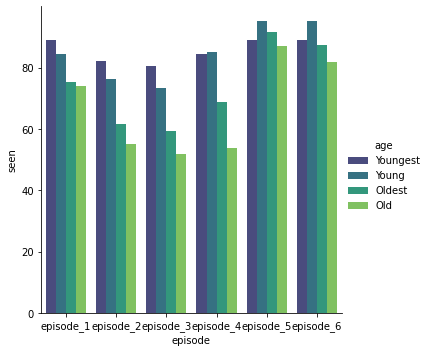

In [106]:
sns.catplot(x='episode', y='seen', hue='age', data=age_work, kind='bar', palette='viridis');

In [107]:
#grouping ranking columns' names with the one for the demographic of interest
rank_and_age = ['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6','Age']

#naming age groups
age_names = ['Youngest','Young', ]
#creating an empty series to populate
age_rank_series = pd.Series(dtype='float')

#pulls a slice of data regarding the ranks of one episode
def get_ranking_all(val,rank_and_demo,demo_string):
    return getattr(clean_both[rank_and_demo].groupby([demo_string]), "ranking_"+val).value_counts()

#one big dataframe containing slices of data for each episode
age_ranks_by_episode = [get_ranking_all(str(i), rank_and_age, 'Age') for i in range(1,7)]

#for loop iterates over data slices, concatenates into a multi-index dataframe, then populates them with the value counts, episode numbers, etc.
for x in np.arange(1,7):
    ep = age_ranks_by_episode[(x-1)]
    sr_concat = pd.concat({'episode_{num}'.format(num=x):ep}, names=['Episode', 'Age', 'Ranking'])
    age_rank_series = age_rank_series.append(sr_concat)
    age_rank_index = pd.MultiIndex.from_tuples(age_rank_series.index, names=['Episode', 'Age', 'Ranking'])   

#takes the sex_rank_series index ( aseries of tuples) and creates a multi-index series for easier graphing
all_ages_rank = pd.DataFrame(data={'val':age_rank_series.values}, index=age_rank_index).reset_index()
all_ages_rank['rank_per'] = np.nan

#grabbing this number for reference
age_length = clean_both['Age'].unique().shape[0]

# for loop sorts ages and ranks into a dataframe
for x in np.arange(0,age_length):
    age = clean_both['Age'].unique()[x]
    mask = all_ages_rank['Age']==age
    rank_masked = all_ages_rank.mask(mask,(all_ages_rank['val']/all_ages[x].shape[0])*100,axis=0)
    rank_col = rank_masked['rank_per']
    all_ages_rank.loc[mask, 'rank_per'] = all_ages_rank.loc[mask, 'rank_per'].fillna(rank_col[mask])
    
#isolating only ranking data for things ranked within the top 3
all_ages_top3 = all_ages_rank[all_ages_rank['Ranking']<4]

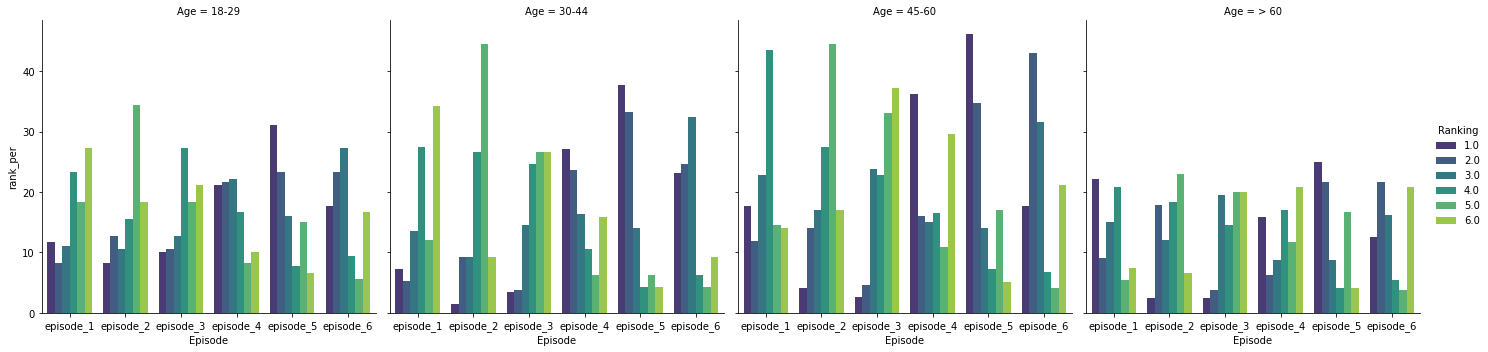

In [108]:
sns.catplot(x='Episode', y='rank_per', hue='Ranking', col = 'Age', data=all_ages_rank, kind='bar', palette='viridis');

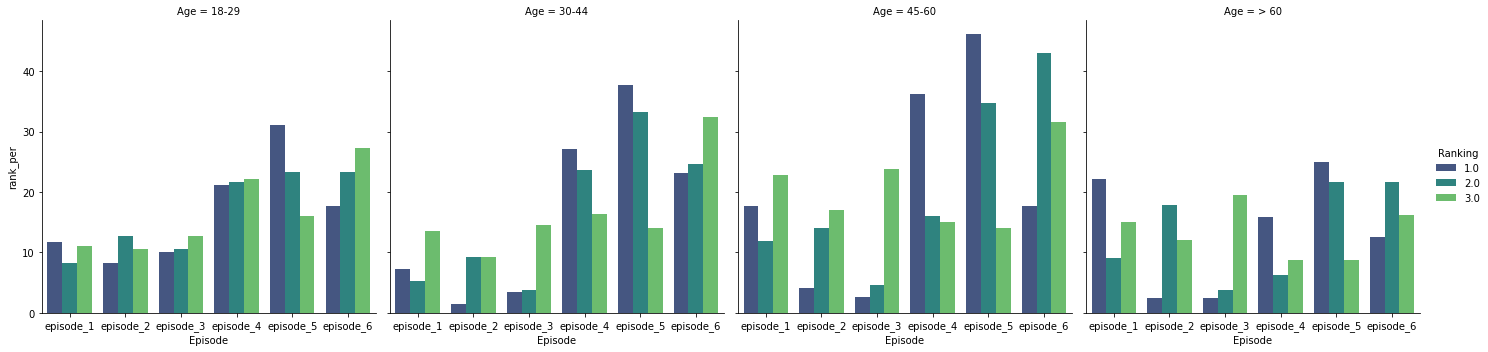

In [109]:
sns.catplot(x='Episode', y='rank_per', hue='Ranking', col = 'Age', data=all_ages_top3, kind='bar', palette='viridis');